<a href="https://colab.research.google.com/github/GabrielMedeiros32/Bootcamp_Data_Science/blob/main/M%C3%B3dulo%201/SuperDesafioM%C3%B3dulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Super desafio

**Escolha outro valor fora o valor aprovado no TABNET e explore estes dados.**

A vacinação de covid-19 tem algum efeito na diminuiçção do contágio da doença? O número de casos cair quando a vacinação aumenta diz algo sobre alguma relação causal? Intuitivamente somos inclinados a dizer que sim, afinal, uma pessoa imunizada não consegue transmitir covid da mesma forma que uma pessoa não vacinada, mas na prática os dados confirmam isso?

Esse é um estudo que, devido à pandemia de covid-19, já foi feito e reproduzido várias vezes e os resultados circulam avidamente na internet através de portais de notícias. Considerando o foco que está sendo dado ao assunto, decidi por procurar por um conjunto de dados sobre novos casos de covid e vacinação de alguns países.

Vou recorrer aos dados do [Our World in Data](https://ourworldindata.org/covid-vaccinations), pois me parece um conjunto de dados bastante robusto e além disso são os mesmos dados análisados pelo google na hora de montar seus gráficos.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.lines import Line2D

In [16]:
dados_covid = pd.read_csv("https://raw.githubusercontent.com/GabrielMedeiros32/Bootcamp_Data_Science/main/Dados/owid-covid-data.csv",
                          sep=",", decimal=".", engine='python')
dados_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90778,ZWE,Africa,Zimbabwe,2021-05-19,38612.0,17.0,20.857,1583.0,0.0,0.571,2597.873,1.144,1.403,106.507,0.000,0.038,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.0,530325.0,35.681,0.209,2032.0,0.137,0.01,97.4,tests performed,844684.0,605556.0,239128.0,12730.0,16331.0,5.68,4.07,1.61,1099.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90779,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.01,96.5,tests performed,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90780,ZWE,Africa,Zimbabwe,2021-05-21,38664.0,29.0,18.429,1586.0,1.0,0.571,2601.372,1.951,1.240,106.708,0.067,0.038,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,887928.0,624665.0,263263.0,20532.0,16098.0,5.97,4.20,1.77,1083.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
90781,ZWE,Africa,Z

Para esse estudo eu gostaria de analisar:
 
*   Israel, pois vacinou grande parte da sua população rapidamente e virou 
referência para essas notícias sobre vacinação.
*   Reino Unido, pois notícias também foram veiculadas sobre a reabertura de shows e outros serviços não essenciais devido ao controle dos casos de covid do país.
*   Brasil, pois é o país no qual estou inserido.

No entanto optei apenas por Israel e Reino Unido, pois não consegui informações mais detalhadas sobre os estados brasileiros e assim devido à sua extensão e população, o Brasil acaba sendo pouco homogêneo.

Começo então por retirar apenas as informações que preciso do conjunto de dados obtidos, separando o caso Israel e o caso Reino Unido

In [17]:
covid = dados_covid.copy()
covid = covid.set_index('location')
covid = covid.T
covid

location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
iso_code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
continent,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,Asia,...,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa,Africa
date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,...,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23
total_cases,1,1,1,1,1,1,1,1,2,4,4,4,4,5,7,8,11,12,13,15,16,18,20,24,25,29,30,34,41,43,76,80,91,107,118,146,175,197,240,275,...,37369,37422,37534,37699,37751,37859,37875,37980,38018,38045,38064,38086,38102,38164,38191,38235,38257,38260,38281,38293,38327,38357,38398,38403,38414,38419,38433,38448,38466,38491,38535,38554,38560,38572,38595,38612,38635,38664,38679,38682
new_cases,1,0,0,0,0,0,0,0,1,2,0,0,0,1,2,1,3,1,1,2,1,2,2,4,1,4,1,4,7,2,33,4,11,16,11,28,29,22,43,35,...,39,53,112,165,52,108,16,105,38,27,19,22,16,62,27,44,22,3,21,12,34,30,41,5,11,5,14,15,18,25,44,19,6,12,23,17,23,29,15,3
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN,0.143,0.143,0,0.143,0.429,0.429,0.429,0.429,0.571,0.857,0.857,1,1.143,1.286,1.571,1.571,1.571,1.714,1.857,1.857,2.286,2.143,2.571,3.286,3.286,7.429,7.857,8.857,11,12,15,18.857,17.286,22.857,26.286,...,55,52.857,55.286,60.857,66.143,78.857,77.857,87.286,85.143,73,52.143,47.857,34.714,41.286,30.143,31,30.286,28,27.857,27.286,23.286,23.714,23.286,20.857,22,19.714,20,17.286,15.571,13.286,18.857,20,20.143,19.857,21,20.857,20.571,18.429,17.857,17.429
total_deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2,3,3,4,4,4,4,4,4,8,...,1548,1550,1551,1552,1553,1553,1554,1555,1555,1556,1556,1557,1560,1565,1565,1567,1567,1568,1570,1573,1574,1574,1575,1576,1576,1576,1576,1579,1579,1582,1582,1582,1582,1582,1583,1583,1585,1586,1586,1586
new

In [18]:
covid_is = covid['Israel'].T.set_index('date').T
info = ['new_cases_smoothed','people_fully_vaccinated','population']
covid_is = covid_is.T.loc[:,info].T
covid_is

date,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,...,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN,NaN,0.286,0.429,0.714,0.714,0.857,1.571,2,1.857,2.571,4.429,5.857,7,6.857,10.429,6.429,8.571,10.714,13,17.286,27.286,29.571,44.429,43.571,73.714,100.714,129,142.571,150.857,299.571,371.714,399,436.857,479,532.857,...,202.286,180.286,152.857,159.143,151.429,146.143,128.857,129.286,136.571,155.857,139.571,127,122.857,118.714,85.714,84.143,72.429,75.714,73.429,68.571,63.429,60.143,53.857,57.857,48.571,48,43.286,37.571,33,31.571,33.143,32.143,28.857,23.857,27.286,29.143,30.143,27.143,28.571,NaN
people_fully_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.96292e+06,4.96937e+06,4.97128e+06,4.97863e+06,4.98559e+06,4.99227e+06,4.99916e+06,5.00662e+06,5.00985e+06,5.01106e+06,5.01788e+06,5.02559e+06,5.032e+06,5.03908e+06,5.04616e+06,5.04915e+06,5.04996e+06,5.0559e+06,5.06152e+06,5.06604e+06,5.06989e+06,5.0728e+06,5.07508e+06,5.0755e+06,5.08012e+06,5.08463e+06,5.08827e+06,5.09135e+06,5.09481e+06,5.09613e+06,5.0963e+06,5.09743e+06,5.09815e+06,5.10292e+06,5.1077e+06,5.11134e+06,5.11255e+06,5.11287e+06,5.11597e+06,NaN
population,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,...,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06


In [19]:
covid_uk = covid['United Kingdom'].T.set_index('date').T
covid_uk = covid_uk.T.loc[:,info].T
covid_uk

date,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN,1.286,1.286,1,1.571,1.714,0.857,1,1,1.143,1.286,0.714,0.571,0.714,0.571,0.571,0.714,0.714,0.714,1.429,1.571,2.143,2.429,3.143,4.714,5.429,9.429,14.857,22.143,29.857,35.857,45.429,52.571,55.571,70.857,100,...,1642.86,1591.71,2676.57,2613.71,2635.71,2545.43,2549,2534,2534,2526.43,2504.86,2483.29,2349.71,2373.57,2331.71,2287.86,2236.86,2206.71,2198.29,2134.71,2032.86,2036.29,2059,2072.29,2093,2106.71,2207.29,2279.57,2299.71,2306.14,2264.43,2265,2287.29,2232.29,1539.14,1517.71,1522.86,1595.71,1662,1685.86
people_fully_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.51386e+06,8.93155e+06,9.43121e+06,9.93085e+06,1.0152e+07,1.04258e+07,1.07758e+07,1.11926e+07,1.16237e+07,1.20887e+07,1.26363e+07,1.28971e+07,1.32018e+07,1.35811e+07,1.4044e+07,1.45355e+07,1.49573e+07,1.53296e+07,1.55025e+07,1.563e+07,1.58875e+07,1.62917e+07,1.67647e+07,1.72305e+07,1.76694e+07,1.78566e+07,1.80884e+07,1.84385e+07,1.8891e+07,1.9319e+07,1.97124e+07,2.01037e+07,2.02874e+07,2.05465e+07,2.08705e+07,2.12395e+07,2.16598e+07,2.20865e+07,2.26434e+07,NaN
population,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,...,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07


Também são retirados os períodos em que ainda não havia acontecido nenhuma vacinação por falta de vacinas autorizadas já que esses períodos são irrelevantes para o estudo.

In [20]:
covid_usavel_is = covid_is.T.query('people_fully_vaccinated > 0').T
covid_usavel_is

date,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,...,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23
new_cases_smoothed,5841.14,6248.71,6694.86,6826.57,6978.14,7233.57,7111,7557.14,7703.43,8087.43,8395.14,8241.71,8295,8624.29,8168,7938,7968.86,7579.29,7711.29,7208.86,6530.57,6117.14,6289.57,6535.43,6575.14,6423.29,6404,6576,7311,7188.86,6754.86,6674.71,6695,6684.86,6952.29,6326,6248.71,5836.43,5599.14,5412.86,...,196.286,202.286,180.286,152.857,159.143,151.429,146.143,128.857,129.286,136.571,155.857,139.571,127,122.857,118.714,85.714,84.143,72.429,75.714,73.429,68.571,63.429,60.143,53.857,57.857,48.571,48,43.286,37.571,33,31.571,33.143,32.143,28.857,23.857,27.286,29.143,30.143,27.143,28.571
people_fully_vaccinated,2,2,2,5,8,30,6004,25239,60876,117689,186434,222314,248291,332738,452934,590443,733822,897750,968664,1.02214e+06,1.16246e+06,1.30161e+06,1.42765e+06,1.55236e+06,1.68263e+06,1.74724e+06,1.7899e+06,1.84923e+06,1.88444e+06,1.91538e+06,1.96664e+06,2.02455e+06,2.0532e+06,2.07533e+06,2.14386e+06,2.20905e+06,2.27632e+06,2.34825e+06,2.41976e+06,2.45717e+06,...,4.96251e+06,4.96292e+06,4.96937e+06,4.97128e+06,4.97863e+06,4.98559e+06,4.99227e+06,4.99916e+06,5.00662e+06,5.00985e+06,5.01106e+06,5.01788e+06,5.02559e+06,5.032e+06,5.03908e+06,5.04616e+06,5.04915e+06,5.04996e+06,5.0559e+06,5.06152e+06,5.06604e+06,5.06989e+06,5.0728e+06,5.07508e+06,5.0755e+06,5.08012e+06,5.08463e+06,5.08827e+06,5.09135e+06,5.09481e+06,5.09613e+06,5.0963e+06,5.09743e+06,5.09815e+06,5.10292e+06,5.1077e+06,5.11134e+06,5.11255e+06,5.11287e+06,5.11597e+06
population,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,...,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06


In [21]:
covid_usavel_uk = covid_uk.T.query('people_fully_vaccinated > 0').T
covid_usavel_uk

date,2021-01-03,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,...,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22
new_cases_smoothed,52495.9,59809.9,58003,55797.4,53669.7,53100.7,51342.6,48675.4,46338.9,45101,43359,42120.4,40573.7,38350.3,37239.4,36016.7,33821.6,31923.4,29977.3,28667.9,27071.3,25606.7,24332.3,23821.4,23355.6,22476.4,21322.6,19902.4,19182.9,18427.7,17780.6,17142.7,16265.9,15238.6,14666.3,13950.9,13249,12625.9,12368,12322.7,...,1681.14,1642.86,1591.71,2676.57,2613.71,2635.71,2545.43,2549,2534,2534,2526.43,2504.86,2483.29,2349.71,2373.57,2331.71,2287.86,2236.86,2206.71,2198.29,2134.71,2032.86,2036.29,2059,2072.29,2093,2106.71,2207.29,2279.57,2299.71,2306.14,2264.43,2265,2287.29,2232.29,1539.14,1517.71,1522.86,1595.71,1662
people_fully_vaccinated,22002,391399,412167,428232,437977,443234,447442,450062,452301,456866,460625,464036,466796,468617,469660,470478,472446,474156,476485,478254,480432,491053,494209,496796,498962,501957,505993,510057,511719,512581,516392,519553,524447,530094,534869,537715,539630,546165,558577,573724,...,8.17008e+06,8.51386e+06,8.93155e+06,9.43121e+06,9.93085e+06,1.0152e+07,1.04258e+07,1.07758e+07,1.11926e+07,1.16237e+07,1.20887e+07,1.26363e+07,1.28971e+07,1.32018e+07,1.35811e+07,1.4044e+07,1.45355e+07,1.49573e+07,1.53296e+07,1.55025e+07,1.563e+07,1.58875e+07,1.62917e+07,1.67647e+07,1.72305e+07,1.76694e+07,1.78566e+07,1.80884e+07,1.84385e+07,1.8891e+07,1.9319e+07,1.97124e+07,2.01037e+07,2.02874e+07,2.05465e+07,2.08705e+07,2.12395e+07,2.16598e+07,2.20865e+07,2.26434e+07
population,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,...,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07


In [22]:
pol_is = (covid_usavel_is.loc['people_fully_vaccinated'] / covid_usavel_is.loc['population']*100).tolist()
covid_usavel_is = covid_usavel_is.T
covid_usavel_is['percentage_vaccinated'] = pol_is
covid_usavel_is = covid_usavel_is.T
covid_usavel_is

date,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,...,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23
new_cases_smoothed,5841.14,6248.71,6694.86,6826.57,6978.14,7233.57,7111,7557.14,7703.43,8087.43,8395.14,8241.71,8295,8624.29,8168,7938,7968.86,7579.29,7711.29,7208.86,6530.57,6117.14,6289.57,6535.43,6575.14,6423.29,6404,6576,7311,7188.86,6754.86,6674.71,6695,6684.86,6952.29,6326,6248.71,5836.43,5599.14,5412.86,...,196.286,202.286,180.286,152.857,159.143,151.429,146.143,128.857,129.286,136.571,155.857,139.571,127,122.857,118.714,85.714,84.143,72.429,75.714,73.429,68.571,63.429,60.143,53.857,57.857,48.571,48,43.286,37.571,33,31.571,33.143,32.143,28.857,23.857,27.286,29.143,30.143,27.143,28.571
people_fully_vaccinated,2,2,2,5,8,30,6004,25239,60876,117689,186434,222314,248291,332738,452934,590443,733822,897750,968664,1.02214e+06,1.16246e+06,1.30161e+06,1.42765e+06,1.55236e+06,1.68263e+06,1.74724e+06,1.7899e+06,1.84923e+06,1.88444e+06,1.91538e+06,1.96664e+06,2.02455e+06,2.0532e+06,2.07533e+06,2.14386e+06,2.20905e+06,2.27632e+06,2.34825e+06,2.41976e+06,2.45717e+06,...,4.96251e+06,4.96292e+06,4.96937e+06,4.97128e+06,4.97863e+06,4.98559e+06,4.99227e+06,4.99916e+06,5.00662e+06,5.00985e+06,5.01106e+06,5.01788e+06,5.02559e+06,5.032e+06,5.03908e+06,5.04616e+06,5.04915e+06,5.04996e+06,5.0559e+06,5.06152e+06,5.06604e+06,5.06989e+06,5.0728e+06,5.07508e+06,5.0755e+06,5.08012e+06,5.08463e+06,5.08827e+06,5.09135e+06,5.09481e+06,5.09613e+06,5.0963e+06,5.09743e+06,5.09815e+06,5.10292e+06,5.1077e+06,5.11134e+06,5.11255e+06,5.11287e+06,5.11597e+06
population,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,...,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06,8.65554e+06
percentage_vaccinated,2.31066e-05,2.31066e-05,2.31066e-05,5.77665e-05,9.24263e-05,0.000346599,0.069366,0.291594,0.703318,1.3597,2.15393,2.56846,2.86858,3.84422,5.23288,6.82156,8.47806,10.372,11.1913,11.809,13.4302,15.0379,16.4941,17.9348,19.4399,20.1863,20.6792,21.3647,21.7714,22.1289,22.7211,23.3902,23.7212,23.9769,24.7687,25.5218,26.2989,27.13,27.9562,28.3884,...,57.3333,57.3381,57.4126,57.4346,57.5195,57.6,57.6771,57.7568,57.843,57.8803,57.8942,57.973,58.0621,58.1361,58.218,58.2998,58.3343,58.3437,58.4123,58.4772,58.5295,58.5739,58.6076,58.6339,58.6387,58.6921,58.7442,58.7862,58.8219,58.8618,58.8771,58.8791,58.8921,58.9004,58.9555,59.0107,59.0528,59.0668,59.0705,59.1063


In [23]:
pol_uk = (covid_usavel_uk.loc['people_fully_vaccinated'] / covid_usavel_uk.loc['population']*100).tolist()
covid_usavel_uk = covid_usavel_uk.T
covid_usavel_uk['percentage_vaccinated'] = pol_uk
covid_usavel_uk = covid_usavel_uk.T
covid_usavel_uk

date,2021-01-03,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,2021-02-09,2021-02-10,2021-02-11,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,...,2021-04-13,2021-04-14,2021-04-15,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22
new_cases_smoothed,52495.9,59809.9,58003,55797.4,53669.7,53100.7,51342.6,48675.4,46338.9,45101,43359,42120.4,40573.7,38350.3,37239.4,36016.7,33821.6,31923.4,29977.3,28667.9,27071.3,25606.7,24332.3,23821.4,23355.6,22476.4,21322.6,19902.4,19182.9,18427.7,17780.6,17142.7,16265.9,15238.6,14666.3,13950.9,13249,12625.9,12368,12322.7,...,1681.14,1642.86,1591.71,2676.57,2613.71,2635.71,2545.43,2549,2534,2534,2526.43,2504.86,2483.29,2349.71,2373.57,2331.71,2287.86,2236.86,2206.71,2198.29,2134.71,2032.86,2036.29,2059,2072.29,2093,2106.71,2207.29,2279.57,2299.71,2306.14,2264.43,2265,2287.29,2232.29,1539.14,1517.71,1522.86,1595.71,1662
people_fully_vaccinated,22002,391399,412167,428232,437977,443234,447442,450062,452301,456866,460625,464036,466796,468617,469660,470478,472446,474156,476485,478254,480432,491053,494209,496796,498962,501957,505993,510057,511719,512581,516392,519553,524447,530094,534869,537715,539630,546165,558577,573724,...,8.17008e+06,8.51386e+06,8.93155e+06,9.43121e+06,9.93085e+06,1.0152e+07,1.04258e+07,1.07758e+07,1.11926e+07,1.16237e+07,1.20887e+07,1.26363e+07,1.28971e+07,1.32018e+07,1.35811e+07,1.4044e+07,1.45355e+07,1.49573e+07,1.53296e+07,1.55025e+07,1.563e+07,1.58875e+07,1.62917e+07,1.67647e+07,1.72305e+07,1.76694e+07,1.78566e+07,1.80884e+07,1.84385e+07,1.8891e+07,1.9319e+07,1.97124e+07,2.01037e+07,2.02874e+07,2.05465e+07,2.08705e+07,2.12395e+07,2.16598e+07,2.20865e+07,2.26434e+07
population,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,...,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07,6.7886e+07
percentage_vaccinated,0.0324102,0.576553,0.607146,0.63081,0.645165,0.652909,0.659108,0.662967,0.666265,0.67299,0.678527,0.683552,0.687617,0.6903,0.691836,0.693041,0.69594,0.698459,0.70189,0.704496,0.707704,0.723349,0.727998,0.731809,0.735,0.739412,0.745357,0.751343,0.753792,0.755061,0.760675,0.765332,0.772541,0.780859,0.787893,0.792085,0.794906,0.804533,0.822816,0.845129,...,12.035,12.5414,13.1567,13.8927,14.6287,14.9545,15.3578,15.8734,16.4873,17.1223,17.8073,18.614,18.9982,19.447,20.0057,20.6876,21.4117,22.033,22.5814,22.8361,23.0239,23.4032,23.9986,24.6954,25.3816,26.028,26.3037,26.6452,27.161,27.8275,28.458,29.0375,29.6138,29.8845,30.2661,30.7434,31.287,31.9061,32.5346,33.3551


Com os dados em mãos podemos então plotar ambas as relações de vacinados e novos casos:

In [24]:
a_range_is = []
my_range_is = []
data_formatada_is = covid_usavel_is.loc['percentage_vaccinated'].index.tolist()
for e in range(len(data_formatada_is)):
  data_formatada_is[e] = (data_formatada_is[e][5:7] + data_formatada_is[e][4] + data_formatada_is[e][:4]).replace('-','/')
#data_formatada = list(dict.fromkeys(data_formatada))
for x in data_formatada_is:
    if x not in my_range_is:
        my_range_is.append(x)
        a_range_is.append(data_formatada_is.index(x))
my_range_is, a_range_is

(['01/2021', '02/2021', '03/2021', '04/2021', '05/2021'], [0, 28, 56, 87, 117])

In [26]:
a_range_uk = []
my_range_uk = []
data_formatada_uk = covid_usavel_uk.loc['percentage_vaccinated'].index.tolist()
for e in range(len(data_formatada_uk)):
  data_formatada_uk[e] = (data_formatada_uk[e][5:7] + data_formatada_uk[e][4] + data_formatada_uk[e][:4]).replace('-','/')
#data_formatada_uk = list(dict.fromkeys(data_formatada_uk))
for x in data_formatada_uk:
    if x not in my_range_uk:
        my_range_uk.append(x)
        a_range_uk.append(data_formatada_uk.index(x))
my_range_uk, a_range_uk

(['01/2021', '02/2021', '03/2021', '04/2021', '05/2021'], [0, 23, 51, 82, 112])

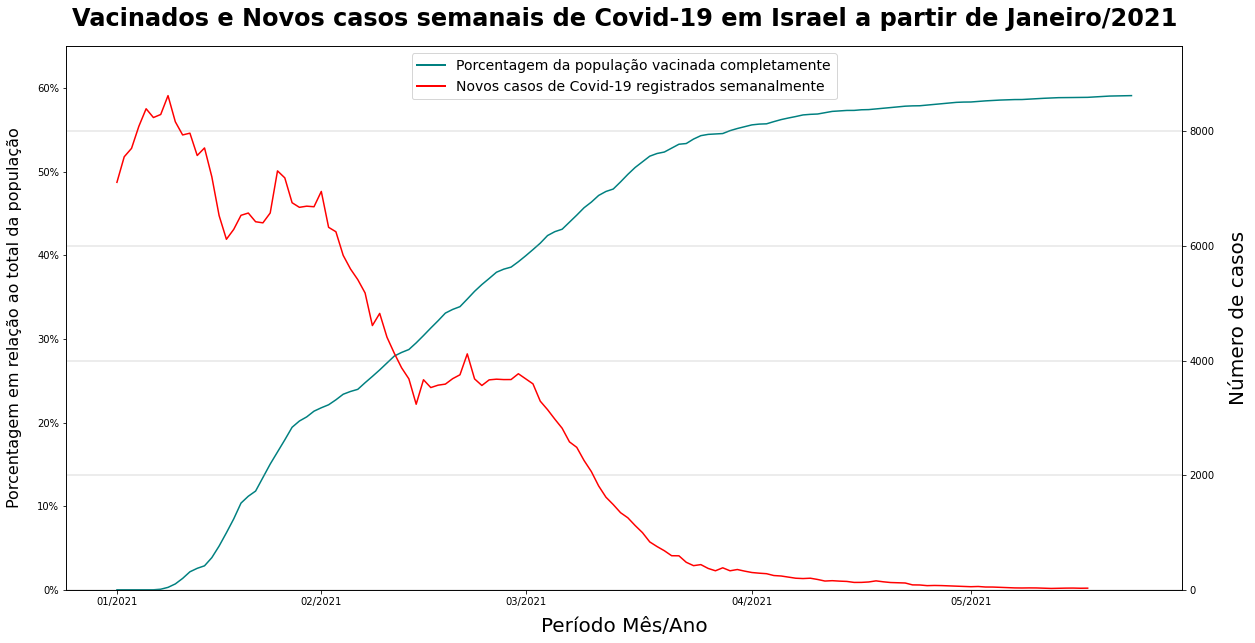

In [27]:
fig, ax = plt.subplots(figsize = (20, 10))

plt.title('Vacinados e Novos casos semanais de Covid-19 em Israel a partir de Janeiro/2021',
          fontdict = {'fontsize': 24, "fontweight":"bold"}, pad = 20)

ax = covid_usavel_is.loc['percentage_vaccinated'].T.plot(color ='teal',zorder=3)
ax.set_xlabel('Período Mês/Ano', fontsize=20, labelpad = 10)
ax.set_ylabel('Porcentagem em relação ao total da população', labelpad = 15, fontdict = {'fontsize': 16})
ylim_u = covid_usavel_is.loc['percentage_vaccinated'].max()*1.1
ax.set_ylim(0,ylim_u)

ax2 = ax.twinx()
ax2 = covid_usavel_is.loc['new_cases_smoothed'].T[6:].plot(color = 'r',zorder=2)
ax2.set_ylabel('Número de casos', labelpad = 15, fontdict = {'fontsize': 20})
ylim_u2 = covid_usavel_is.loc['new_cases_smoothed'].max()*1.1
ax2.set_ylim(0,ylim_u2)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}%'))

# plt.xticks(np.arange(0, len(covid_usavel_is.loc['percentage_vaccinated']),
#                      len(covid_usavel_is.loc['percentage_vaccinated'])/5),my_range)
plt.xticks(a_range_is, my_range_is)

custom_lines = [Line2D([0], [0], color = 'teal', lw = 2), Line2D([0], [0], color = 'r', lw = 2)]
ax.legend(custom_lines, ['Porcentagem da população vacinada completamente', 'Novos casos de Covid-19 registrados semanalmente'],
          loc='upper center', fontsize = 14)

plt.grid(color = 'grey', linestyle = '-', linewidth = 0.3, axis = 'y',zorder=1)

plt.show()

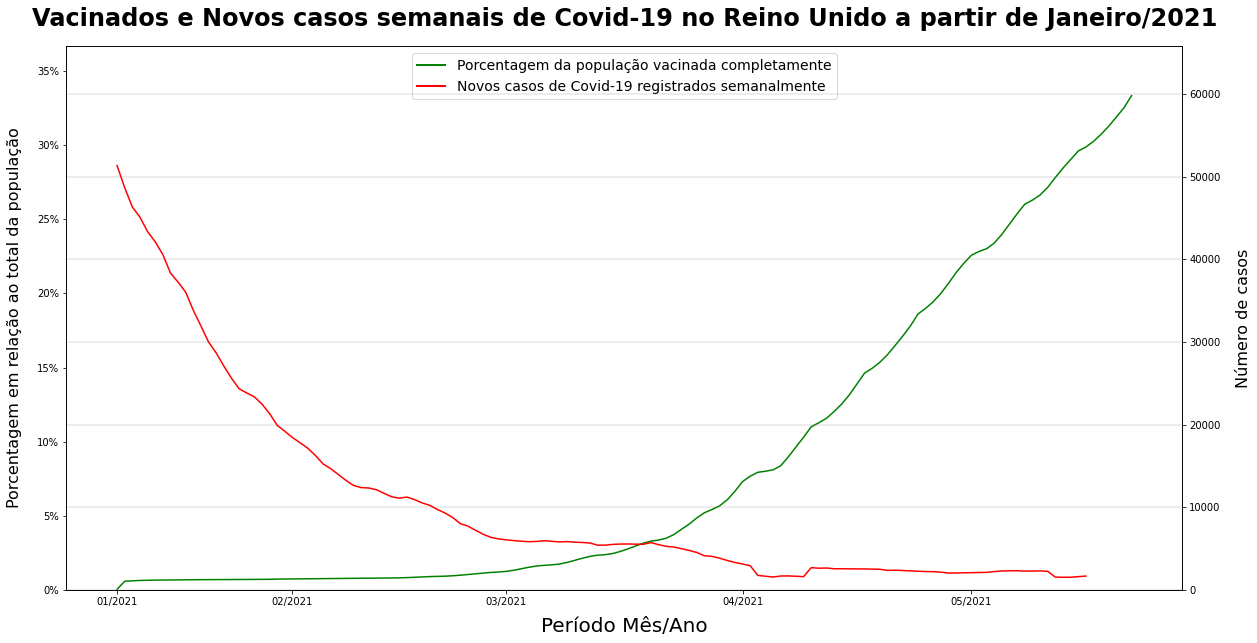

In [28]:
fig, ax = plt.subplots(figsize = (20, 10))

plt.title('Vacinados e Novos casos semanais de Covid-19 no Reino Unido a partir de Janeiro/2021',
          fontdict = {'fontsize': 24, "fontweight":"bold"}, pad = 20)

ax = covid_usavel_uk.loc['percentage_vaccinated'].T.plot(color ='g',zorder=3)
ax.set_xlabel('Período Mês/Ano', fontsize=20, labelpad = 10)
ax.set_ylabel('Porcentagem em relação ao total da população', labelpad = 15, fontdict = {'fontsize': 16})
ylim_u = covid_usavel_uk.loc['percentage_vaccinated'].max()*1.1
ax.set_ylim(0,ylim_u)

ax2 = ax.twinx()
ax2 = covid_usavel_uk.loc['new_cases_smoothed'].T[6:].plot(color = 'r',zorder=2)
ax2.set_ylabel('Número de casos', labelpad = 15, fontdict = {'fontsize': 16})
ylim_u2 = covid_usavel_uk.loc['new_cases_smoothed'].max()*1.1
ax2.set_ylim(0,ylim_u2)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}%'))

plt.xticks(a_range_uk, my_range_uk)

custom_lines = [Line2D([0], [0], color = 'g', lw = 2), Line2D([0], [0], color = 'r', lw = 2)]
ax.legend(custom_lines, ['Porcentagem da população vacinada completamente', 'Novos casos de Covid-19 registrados semanalmente'],
          loc='upper center', fontsize = 14)

plt.grid(color = 'grey', linestyle = '-', linewidth = 0.3, axis = 'y',zorder=1)

plt.show()

Ambos os gráficos parecem apresentar uma tendência entre o aumento da porcentagem da população vacinada e a diminuião dos casos de covid.

Além de visual, essa relação ocorre matemáticamente?

In [29]:
vac_is = covid_usavel_is.loc['percentage_vaccinated'].astype(int).values
vac_is

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  2,  2,  3,  5,  6,  8,
       10, 11, 11, 13, 15, 16, 17, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23,
       24, 25, 26, 27, 27, 28, 28, 29, 30, 31, 32, 33, 33, 33, 34, 35, 36,
       37, 37, 38, 38, 39, 39, 40, 41, 42, 42, 43, 43, 44, 45, 46, 47, 47,
       47, 48, 49, 50, 51, 51, 52, 52, 52, 53, 53, 53, 54, 54, 54, 54, 54,
       55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59,
       59, 59, 59, 59])

In [30]:
casos_is = covid_usavel_is.loc['new_cases_smoothed'].astype(int).values
casos_is

array([5841, 6248, 6694, 6826, 6978, 7233, 7111, 7557, 7703, 8087, 8395,
       8241, 8295, 8624, 8168, 7938, 7968, 7579, 7711, 7208, 6530, 6117,
       6289, 6535, 6575, 6423, 6404, 6576, 7311, 7188, 6754, 6674, 6695,
       6684, 6952, 6326, 6248, 5836, 5599, 5412, 5180, 4611, 4823, 4408,
       4128, 3874, 3681, 3238, 3666, 3529, 3571, 3589, 3684, 3752, 4117,
       3680, 3565, 3663, 3675, 3668, 3669, 3770, 3681, 3594, 3292, 3143,
       2977, 2819, 2581, 2486, 2256, 2063, 1812, 1616, 1487, 1345, 1256,
       1121,  998,  835,  754,  682,  594,  593,  480,  421,  439,  373,
        332,  383,  331,  354,  325,  301,  290,  281,  249,  240,  222,
        202,  196,  202,  180,  152,  159,  151,  146,  128,  129,  136,
        155,  139,  127,  122,  118,   85,   84,   72,   75,   73,   68,
         63,   60,   53,   57,   48,   48,   43,   37,   33,   31,   33,
         32,   28,   23,   27,   29,   30,   27,   28])

In [31]:
vac_uk = covid_usavel_uk.loc['percentage_vaccinated'].astype(int).values
vac_uk

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,  7,  7,  7,
        8,  8,  8,  8,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15,
       16, 17, 17, 18, 18, 19, 20, 20, 21, 22, 22, 22, 23, 23, 23, 24, 25,
       26, 26, 26, 27, 27, 28, 29, 29, 29, 30, 30, 31, 31, 32, 33])

In [34]:
casos_uk = covid_usavel_uk.loc['new_cases_smoothed'].astype(int).values
casos_uk

array([52495, 59809, 58003, 55797, 53669, 53100, 51342, 48675, 46338,
       45101, 43359, 42120, 40573, 38350, 37239, 36016, 33821, 31923,
       29977, 28667, 27071, 25606, 24332, 23821, 23355, 22476, 21322,
       19902, 19182, 18427, 17780, 17142, 16265, 15238, 14666, 13950,
       13249, 12625, 12368, 12322, 12115, 11673, 11258, 11093, 11219,
       10917, 10515, 10219,  9717,  9289,  8749,  8007,  7705,  7201,
        6719,  6353,  6162,  6048,  5957,  5879,  5822,  5850,  5944,
        5872,  5792,  5835,  5763,  5731,  5659,  5400,  5403,  5497,
        5537,  5545,  5521,  5513,  5708,  5461,  5259,  5170,  4978,
        4762,  4517,  4116,  4046,  3826,  3547,  3309,  3121,  2915,
        1742,  1641,  1544,  1666,  1681,  1642,  1591,  2676,  2613,
        2635,  2545,  2549,  2534,  2534,  2526,  2504,  2483,  2349,
        2373,  2331,  2287,  2236,  2206,  2198,  2134,  2032,  2036,
        2059,  2072,  2093,  2106,  2207,  2279,  2299,  2306,  2264,
        2265,  2287,

In [35]:
np.corrcoef(vac_is,casos_is)[0,1]

-0.9666481739008351

In [36]:
np.corrcoef(vac_uk,casos_uk)[0,1]

-0.5317238542410663

Como podemos ver desses valores, ambos tem uma forte correlação e uma correlação altíssima no caso de Israel.

Podemos concluir então que os casos de covid e seu controle estão unicamente atralados à vacinação? Não, além do mais existem outras formas de controle como é o caso do próprio Reino Unido que controlou seus casos com lockdown antes mesmo da vacinação e por isso a queda no gráfico antes do começo das vacinas.

Porém, podemos ainda sim ver que a vacinação tem grande impacto na ocorrência de novos casos e assim comprovamos o que os grandes veículos de notícias circulam #VacinaSim.